In [349]:
import pandas as pd
import numpy as np 

#Reading the file.
df = pd.read_excel("TA1.xlsx")
df.columns

Index(['Publisher', 'Keyword', 'Ad Group', 'Keyword Type', 'Clicks',
       'Impressions', 'CTR', 'Avg CPC', 'Total Advertising Cost',
       'Avg Position', 'Conversions', 'Revenue per Conversion',
       'Total Revenue'],
      dtype='object')

In [350]:
#Adding Columns to the data frame. 

#Transaction Per Conversion.
df['Transaction Per Conversion'] = df['Conversions'] / df ['Clicks']
df

,Publisher,Keyword,Ad Group,Keyword Type,Clicks,Impressions,CTR,Avg CPC,Total Advertising Cost,Avg Position,Conversions,Revenue per Conversion,Total Revenue,Transaction Per Conversion
0,Overture,fun games,Kid's Games,exact,245,3705,0.066100,0.38,91.92,1.78,14,117.535033,1645.490458,0.057143
1,Overture,math games,Math Games,phrase,54,1775,0.030400,0.51,27.73,2.76,5,120.013201,600.066004,0.092593
2,Overture,For kids games,Kid's Games,broad,70,1019,0.068700,0.25,17.35,2.53,6,100.423288,602.539728,0.085714
3,Overture,kids games,Kid's Games,phrase,45,963,0.046700,0.21,9.31,3.52,5,114.841613,574.208065,0.111111
4,Overture,www.games,Kid's Games,broad,5,465,0.010800,0.12,0.60,4.29,0,110.614357,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,Yahoo-US,math games 8th grade,math games - YU,phrase,0,34,0.000000,0.00,0.00,4.93,0,80.604881,0.000000,NaN
2329,Yahoo-US,number math games,math games - YU,broad,1,69,0.014493,0.91,0.91,3.12,0,172.592744,0.000000,0.000000
2330,Yahoo-US,play free math games.com,math games - YU,broad,0,39,0.000000,0.00,0.00,4.52,0,273.393984,0.000000,NaN
2331,Yahoo-US,math games for kids grade 6,math games - YU,broad,1,125,0.008000,0.07,0.07,7.92,0,227.256664,0.000000,0.000000


In [351]:
#pivot table
t_original = pd.pivot_table(df, values = ['Clicks','Impressions','Total Advertising Cost','Conversions','Total Revenue'] ,index = ['Publisher'], aggfunc = np.sum, margins = True)
t_original

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue
Publisher,,,,,
Google-Global,1886,280,46368,1326.04,43103.298733
Google-US,3765,716,59880,2730.59,174012.797061
MSN-Global,466,348,74731,293.21,31873.507235
MSN-US,289,140,42440,185.76,19103.986289
Overture,587,63,13202,202.15,6679.198070
Yahoo-Global,717,154,77989,479.60,22126.577844
Yahoo-US,617,173,67990,284.55,33750.377869
All,8327,1874,382600,5501.90,330649.743102


In [357]:
t1 = t_original['Total Revenue'] - t_original['Total Advertising Cost'] # Net Revenue. 
t2 = (t_original['Total Advertising Cost'] / t_original['Clicks']) # Avg Cost Per Click. 
t3 = t1 / t_original['Total Advertising Cost'] # ROA
t4 = t_original['Conversions'] / t_original['Impressions'] # Prob. Booking or Sale.
t5 = t_original['Total Advertising Cost'] # Sum of Click Charges = Total Advertising Cost.  
t6 = (t_original['Clicks'] / t_original['Impressions'])  #CTR
t7 = (t_original['Conversions'] / t_original['Clicks'])  #TCR


t = pd.concat([t1,t2,t3,t4,t5,t6,t7], axis = 1)

t.columns = ['Net Revenue','Avg Cost Per Click','ROA', 'Prob. Sale','Total Advertising Cost','CTR','TCR']
t

,Net Revenue,Avg Cost Per Click,ROA,Prob. Sale,Total Advertising Cost,CTR,TCR
Publisher,,,,,,,
Google-Global,41777.258733,0.703097,31.505278,0.006039,1326.04,0.040675,0.148462
Google-US,171282.207061,0.725256,62.727179,0.011957,2730.59,0.062876,0.190173
MSN-Global,31580.297235,0.629206,107.705389,0.004657,293.21,0.006236,0.746781
MSN-US,18918.226289,0.642768,101.842303,0.003299,185.76,0.006810,0.484429
Overture,6477.048070,0.344378,32.040802,0.004772,202.15,0.044463,0.107325
Yahoo-Global,21646.977844,0.668898,45.135483,0.001975,479.60,0.009194,0.214784
Yahoo-US,33465.827869,0.461183,117.609657,0.002544,284.55,0.009075,0.280389
All,325147.843102,0.660730,59.097374,0.004898,5501.90,0.021764,0.225051


#Q1. Highest ROA on Dollars

In [360]:
t_ROA = pd.pivot_table(data = t, index=['Publisher'], values = ['ROA'])
t_ROA

,ROA
Publisher,
All,59.097374
Google-Global,31.505278
Google-US,62.727179
MSN-Global,107.705389
MSN-US,101.842303
Overture,32.040802
Yahoo-Global,45.135483
Yahoo-US,117.609657


#Q2, Q3, Q4 -> Bubble Chart CTR vs TCR, size as Net Revenue. 

In [361]:
t_d = pd.DataFrame()
t_d['CTR'] = t['CTR']
t_d['TCR'] = t['TCR']
t_d['Net Revenue'] = t['Net Revenue']
t_d

,CTR,TCR,Net Revenue
Publisher,,,
Google-Global,0.040675,0.148462,41777.258733
Google-US,0.062876,0.190173,171282.207061
MSN-Global,0.006236,0.746781,31580.297235
MSN-US,0.006810,0.484429,18918.226289
Overture,0.044463,0.107325,6477.048070
Yahoo-Global,0.009194,0.214784,21646.977844
Yahoo-US,0.009075,0.280389,33465.827869
All,0.021764,0.225051,325147.843102


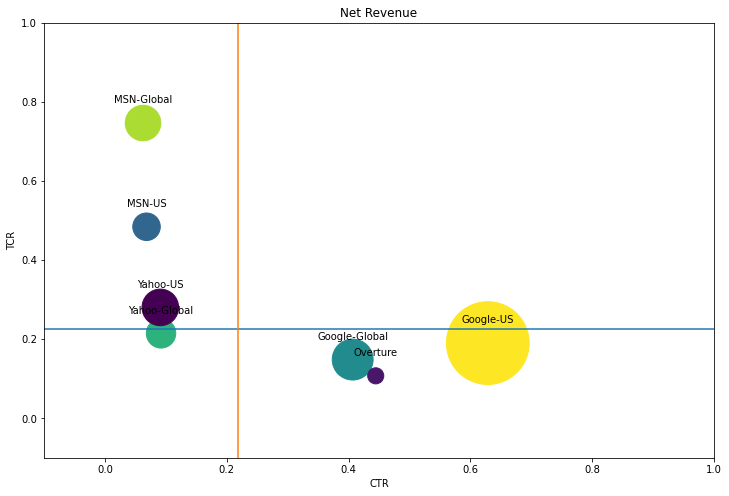

In [362]:
#Bubble Chart
import matplotlib.pyplot as plt
color = np.random.rand(7)
x = t_d['CTR'].drop(['All']) * 10
y = t_d['TCR'].drop(['All'])
size = t_d['Net Revenue'].drop(['All']) / 25
# global average
x_g = t_d['CTR']['All'] * 10
y_g = t_d['TCR']['All'] 


plt.figure(figsize=(12,8))
plt.scatter(x, y, s = size, c = color)
plt.plot([-0.1,1],[y_g, y_g])
plt.plot([x_g, x_g],[-0.1,1])

for xi, yi, i in zip(x, y, x.index):
    plt.annotate(i, (xi, yi), textcoords = 'offset pixels', xytext = (0, 20), ha = 'center')

plt.axis([-0.1,1, -0.1, 1])
plt.xlabel("CTR")
plt.ylabel("TCR" )
plt.title("Net Revenue")
plt.savefig("bubble_CTR_TCR.png")
plt.show()

#Q5 -> Pivot Table for Keywords, Match, Phrase and ROA. 

In [363]:
#pivot table
t_keyWord = pd.pivot_table(df, values = ['Clicks','Total Advertising Cost', 'Impressions','Conversions','Total Revenue'] ,index = ['Publisher','Keyword Type'], aggfunc = np.sum, margins = True)
t_keyWord

Clicks  Conversions  Impressions  \
Publisher     Keyword Type                                     
Google-Global broad            464           54        12096   
              exact            464           97        12109   
              phrase           958          129        22163   
Google-US     broad           1605          344        21596   
              exact           1329           98        21787   
              phrase           831          274        16497   
MSN-Global    broad            185          141        26892   
              exact             85           51        22201   
              phrase           196          156        25638   
MSN-US        broad            104           58        17657   
              exact             90           43        10959   
              phrase            95           39        13824   
Overture      broad            187           26         5141   
              exact            279           21         4991   
              phrase           121           16         3070   
Yahoo-Global  broad            369           74        43844   
              exact            157           39        17135   
              phrase           191           41        17010   
Yahoo-US      broad            370          120        36034   
              exact             77            9        12928   
              phrase           170           44        19028   
All                           8327         1874       382600   

                            Total Advertising Cost  Total Revenue  
Publisher     Keyword Type                                         
Google-Global broad                         342.87   12427.742774  
              exact                         229.02   10348.869472  
              phrase                        754.15   20326.686488  
Google-US     broad                         904.76   87100.978543  
              exact                        1266.31   22556.334241  
              phrase                        559.52   64355.484277  
MSN-Global    broad                         128.02   14611.302499  
              exact                          56.90    5964.340712  
              phrase                        108.29   11297.864023  
MSN-US        broad                          67.67   10391.225914  
              exact                          73.18    4774.548975  
              phrase                         44.91    3938.211401  
Overture      broad                          56.78    2553.889994  
              exact                         100.56    2282.598815  
              phrase                         44.81    1842.709262  
Yahoo-Global  broad                         202.50    7894.139452  
              exact                         107.62    6579.963830  
              phrase                        169.48    7652.474562  
Yahoo-US      broad                         133.54   26004.372812  
              exact                          49.77    1314.891812  
              phrase                        101.24    6431.113246  
All                                        5501.90  330649.743102

In [364]:
t_k = pd.DataFrame()
t_k['Net Revenue'] = t_keyWord['Total Revenue'] - t_keyWord['Total Advertising Cost']
t_k['ROA'] = t_k['Net Revenue'] / t_keyWord['Total Advertising Cost']
t_k

Net Revenue         ROA
Publisher     Keyword Type                           
Google-Global broad          12084.872774   35.246224
              exact          10119.849472   44.187623
              phrase         19572.536488   25.953108
Google-US     broad          86196.218543   95.269705
              exact          21290.024241   16.812648
              phrase         63795.964277  114.019095
MSN-Global    broad          14483.282499  113.132967
              exact           5907.440712  103.821454
              phrase         11189.574023  103.329707
MSN-US        broad          10323.555914  152.557351
              exact           4701.368975   64.243905
              phrase          3893.301401   86.691191
Overture      broad           2497.109994   43.978690
              exact           2182.038815   21.698874
              phrase          1797.899262   40.122724
Yahoo-Global  broad           7691.639452   37.983405
              exact           6472.343830   60.140716
              phrase          7482.994562   44.152670
Yahoo-US      broad          25870.832812  193.730963
              exact           1265.121812   25.419365
              phrase          6329.873246   62.523442
All                         325147.843102   59.097374

#Q6 -> Pivot Table with conversions and ROA

In [365]:
#pivot table
t_global = pd.pivot_table(df, values = ['Clicks','Total Advertising Cost', 'Impressions','Conversions','Total Revenue'] ,index = ['Publisher'], aggfunc = np.sum, margins = True)
t_global.sort_values(by = ['Conversions'], ascending = False).drop(['All'])

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue
Publisher,,,,,
Google-US,3765,716,59880,2730.59,174012.797061
MSN-Global,466,348,74731,293.21,31873.507235
Google-Global,1886,280,46368,1326.04,43103.298733
Yahoo-US,617,173,67990,284.55,33750.377869
Yahoo-Global,717,154,77989,479.60,22126.577844
MSN-US,289,140,42440,185.76,19103.986289
Overture,587,63,13202,202.15,6679.198070


In [366]:
t_g = pd.DataFrame()
t_g['Net Revenue'] = t_global['Total Revenue'] - t_global['Total Advertising Cost']
t_g['ROA'] = t_g['Net Revenue'] / t_global['Total Advertising Cost']
t_g['Conversions'] = t_global['Conversions']
t_g.sort_values(by = ['Conversions'], ascending = False).drop(['All'])

,Net Revenue,ROA,Conversions
Publisher,,,
Google-US,171282.207061,62.727179,716
MSN-Global,31580.297235,107.705389,348
Google-Global,41777.258733,31.505278,280
Yahoo-US,33465.827869,117.609657,173
Yahoo-Global,21646.977844,45.135483,154
MSN-US,18918.226289,101.842303,140
Overture,6477.048070,32.040802,63


Q7 -> Search Side Stratergies -> Relates to CTR. High Clicks lead to High CTR, hence better Search Side Copy.

In [367]:
t_g['Clicks'] = t_global['Clicks']
t_g.sort_values(by = ['Clicks'], ascending = False).drop(['All'])

,Net Revenue,ROA,Conversions,Clicks
Publisher,,,,
Google-US,171282.207061,62.727179,716,3765
Google-Global,41777.258733,31.505278,280,1886
Yahoo-Global,21646.977844,45.135483,154,717
Yahoo-US,33465.827869,117.609657,173,617
Overture,6477.048070,32.040802,63,587
MSN-Global,31580.297235,107.705389,348,466
MSN-US,18918.226289,101.842303,140,289


Q8 -> Bubble Chart for Optimization of publisher Stratergy, X = Prob of Sales, Y = Cost Per Click, S = size of Total Cost

In [368]:
# derived fields
t_f = pd.DataFrame()
t_f['Avg. CPC'] = t['Avg Cost Per Click']
t_f['Prob. Sale'] = t['Prob. Sale']
t_f['Total Advertising Cost'] = t['Total Advertising Cost']
t_f

,Avg. CPC,Prob. Sale,Total Advertising Cost
Publisher,,,
Google-Global,0.703097,0.006039,1326.04
Google-US,0.725256,0.011957,2730.59
MSN-Global,0.629206,0.004657,293.21
MSN-US,0.642768,0.003299,185.76
Overture,0.344378,0.004772,202.15
Yahoo-Global,0.668898,0.001975,479.60
Yahoo-US,0.461183,0.002544,284.55
All,0.660730,0.004898,5501.90


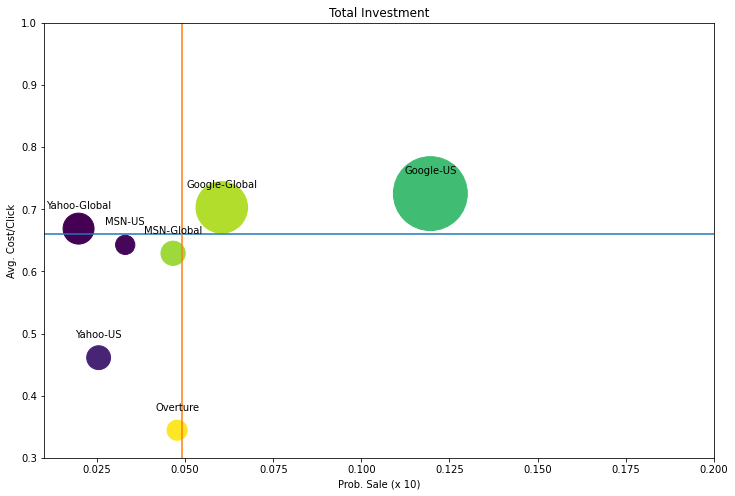

In [369]:
#Bubble Chart
import matplotlib.pyplot as plt
color = np.random.rand(7)
x = t_f['Prob. Sale'].drop(['All']) * 10
y = t_f['Avg. CPC'].drop(['All']) 
size = t_f['Total Advertising Cost'].drop(['All']) * 2
# global average
x_g = t_f['Prob. Sale']['All'] * 10
y_g = t_f['Avg. CPC']['All']


plt.figure(figsize=(12,8))
plt.scatter(x, y, s = size, c = color)
plt.plot([0.01,0.2],[y_g, y_g])
plt.plot([x_g, x_g],[0.3,1])

for xi, yi, i in zip(x, y, x.index):
    plt.annotate(i, (xi, yi), textcoords = 'offset pixels', xytext = (0, 20), ha = 'center')

plt.axis([0.01,0.2, 0.3, 1])
plt.xlabel("Prob. Sale (x 10)")
plt.ylabel("Avg. Cost/Click" )
plt.title("Total Investment")
plt.savefig("bubble.png")
plt.show()